# First analysis of coincidence events measured with prototype-1 of BoxSi
Prototype 1 - as-designed evaluation kit: 1 SiPM in each side
last update Sep-24, 2020

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import sys; sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/mySoftware/MySoftwarePackage/mac/'); 
from my_tools import *; from plot_tools import *

In [10]:
PETsys_binsize_ns = 0.031 # bin size in PETsys TDC bin size is 31±3 ps [TOFPETv2 characterization paper, p.6]
main_data_path = '/Users/erezcohen/Desktop/data/PETsys/Prototype1/'
main_figures_path = '/Users/erezcohen/Desktop/PETsys/write-ups/Prototype1/Figures/'

## coincidence FoM labels
### from page 37 of software guide:
• “mh n1”, the number of events that belong to the same group of this particular event (for the event in the trigger region of higher ID number). If “mh n” is 1, then no other events were detected within a radius of 100mm and a 100 ns time window (default grouping spacial and time windows).

• “mh j1”, the number ID (from 0 to “mh n”-1) of this event in the group it belongs to (ordered from higher to lower energy, for the event in the trigger region of higher ID number). For example, an event with “mh j” set to 1 means this 
event has the second highest energy in the group it belongs to.

• Time of detection in picoseconds (for the event in the trigger region of higher ID number).

• Energy of the pulse, for the event in the trigger region of higher ID number (in QDC mode, in arbitrary units of charge; in TOT mode, in nanoseconds). If the energy calibration file (see section 3.1.4) exists and is referenced in the reference configuration file, the energy value will also have arbitrary units of charge.

• Absolute channel ID, for the event in the trigger region of higher ID number (see appendix A).

• “mh n2”, same as “mh n1”, but for the coincidence event in the trigger region of lower ID number.

• “mh j2”, same as “mh n2”, but for the coincidence event in the trigger region of lower ID number.

• Time of detection in picoseconds (for the event in the trigger region of lower ID number).

• Energy of the pulse, for the event in the trigger region of lower ID number (in QDC mode, in ADC units; in TOT mode, in nanoseconds).

• Absolute channel ID, for the event in the trigger region of lower ID number

In [12]:
# replace \t by ',' and add the following header line into the data file:
# mh-n1,mh-j1,time1,e1,id1,mh-n2,mh-j2,time2,e2,id2
Cf252_dT_sec = 1000;
Cf252_filename = main_data_path + 'Cf252_source/'+ 'Cf252_24092020_0950_%dsec_coinc.dat'%Cf252_dT_sec
Cf252 = pd.read_csv(Cf252_filename)
Cf252[0:3]

# Na22 was measured twice
Na22_dT_sec_1 = 3600;
Na22_filename_1 = main_data_path + 'Na22_source_nC/'+ 'Na22_24092020_1115_%dsec_coinc.dat'%Na22_dT_sec_1
Na22_1 = pd.read_csv(Na22_filename_1)

Na22_dT_sec_2 = 7200;
Na22_filename_2 = main_data_path + 'Na22_source_nC/'+ 'Na22_24092020_1115_%dsec_coinc.dat'%Na22_dT_sec_2
Na22_2 = pd.read_csv(Na22_filename_2)

Na22 = pd.concat([Na22_1,Na22_2])
Na22[0:3]

,mh-n1,mh-j1,time1,e1,id1,mh-n2,mh-j2,time2,e2,id2
0,1,0,234301568172840,9.042160,290,1,0,234301568171018,29.679581,21
1,1,0,347521946371893,23.408783,290,1,0,347521946372058,3.157753,21
2,1,0,403643719020835,23.921394,290,1,0,403643719021582,4.113060,21


saved /Users/erezcohen/Desktop/PETsys/write-ups/Prototype1/Figures/time_difference_between_SiPMs.pdf


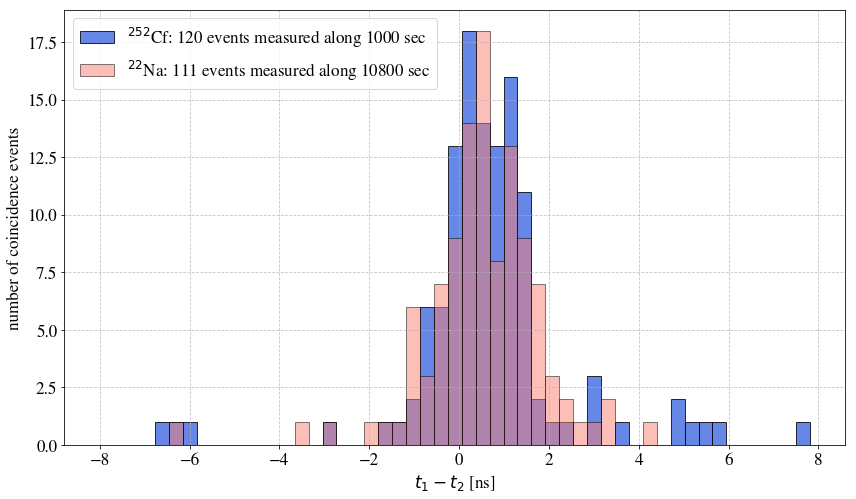

In [13]:
fig,ax=plt.subplots(figsize=(14,8));

plt.hist((Cf252.time1-Cf252.time2)*1.e-3,bins=np.arange(-8,8,PETsys_binsize_ns*10),
         color='royalblue',edgecolor='black',alpha=0.8,label='$^{252}$Cf: %d events measured along %d sec'%(len(Cf252),Cf252_dT_sec));
plt.hist((Na22.time1-Na22.time2)*1.e-3,bins=np.arange(-8,8,PETsys_binsize_ns*10),
         color='salmon',edgecolor='black',alpha=.5,
         label='$^{22}$Na: %d events measured along %d sec'%(len(Na22),Na22_dT_sec_1+Na22_dT_sec_2));

set_axes(ax=ax,x_label='$t_1 - t_2$ [ns]',y_label='number of coincidence events',
         fontsize=17,do_add_grid=True,do_add_legend=True,legend_loc='upper left');

save_figure(filename = main_figures_path + 'time_difference_between_SiPMs.pdf')

saved /Users/erezcohen/Desktop/PETsys/write-ups/Prototype1/Figures/deposited_charge_ratio_of_two_SiPMs.pdf


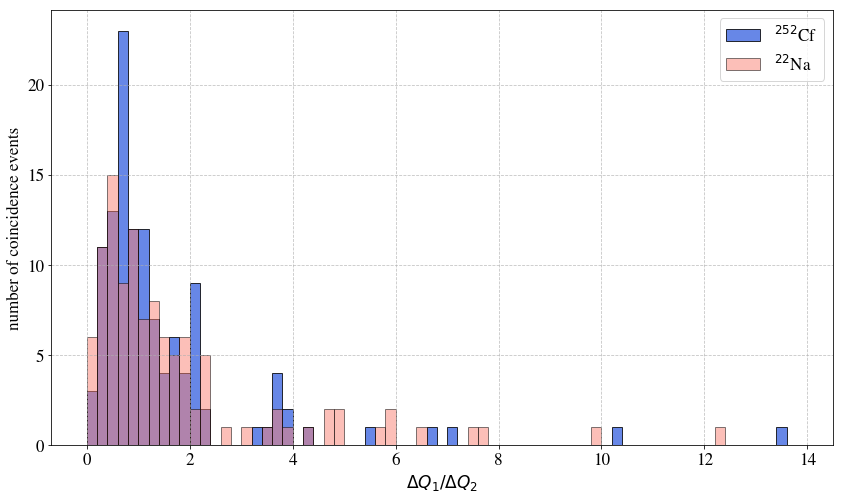

In [14]:
fig,ax=plt.subplots(figsize=(14,8));

plt.hist(Cf252.e1/Cf252.e2,bins=np.arange(0,14,0.2),
         color='royalblue',edgecolor='black',alpha=.8,label='$^{252}$Cf');

plt.hist(Na22.e1/Na22.e2,bins=np.arange(0,14,0.2),
         color='salmon',edgecolor='black',alpha=.5,label='$^{22}$Na');


set_axes(ax=ax,x_label='$\Delta Q_1/\Delta Q_2$',y_label='number of coincidence events',fontsize=17,do_add_grid=True,
         do_add_legend=True,legend_loc='best');

save_figure(filename = main_figures_path + 'deposited_charge_ratio_of_two_SiPMs.pdf')

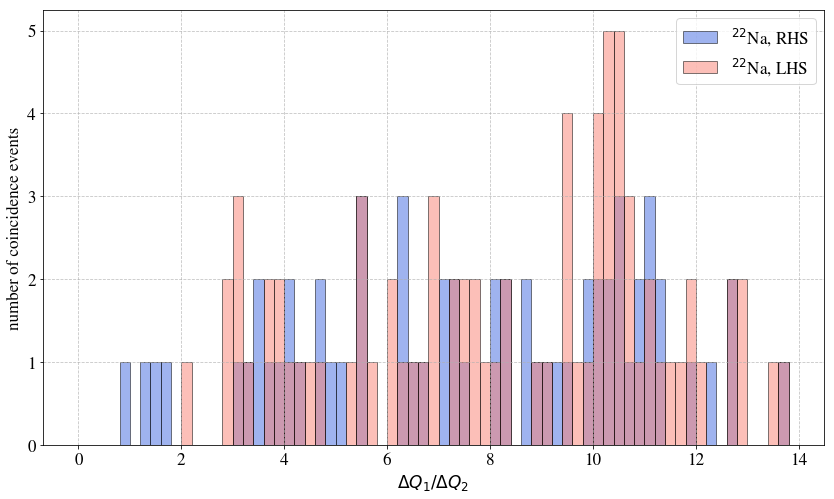

In [15]:
fig,ax=plt.subplots(figsize=(14,8));

plt.hist(Na22.e1,bins=np.arange(0,14,0.2),
         color='royalblue',edgecolor='black',alpha=.5,label='$^{22}$Na, RHS');


plt.hist(Na22.e2,bins=np.arange(0,14,0.2),
         color='salmon',edgecolor='black',alpha=.5,label='$^{22}$Na, LHS');


set_axes(ax=ax,x_label='$\Delta Q_1/\Delta Q_2$',y_label='number of coincidence events',fontsize=17,do_add_grid=True,
         do_add_legend=True,legend_loc='best');
